In [288]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [289]:
IBM_Hr=pd.read_csv('HR_Attrition_Rate_Analytics.csv')
IBM_Hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [290]:
IBM_Hr.shape

(1470, 35)

In [291]:
IBM_Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [292]:
IBM_Hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [293]:
IBM_Hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking Null values

In [294]:
IBM_Hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

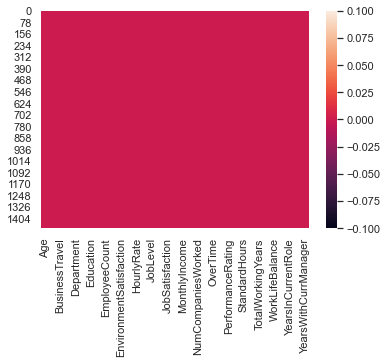

In [295]:
sns.heatmap(IBM_Hr.isnull())

# Visualization

No     1233
Yes     237
Name: Attrition, dtype: int64

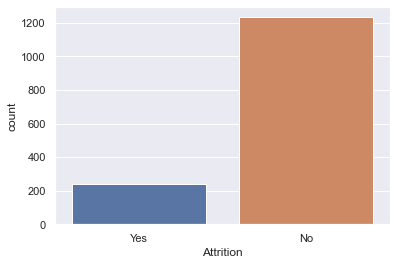

In [296]:
sns.countplot(IBM_Hr['Attrition'])
IBM_Hr['Attrition'].value_counts()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

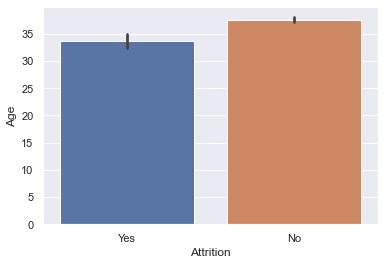

In [297]:
sns.barplot(x ='Attrition',y='Age',data=IBM_Hr)

In [298]:
IBM_Hr['Male']=IBM_Hr.Gender=='Male'

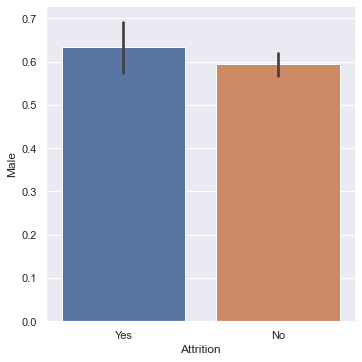

In [299]:
sns.factorplot(x='Attrition',y='Male',kind='bar',data=IBM_Hr)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

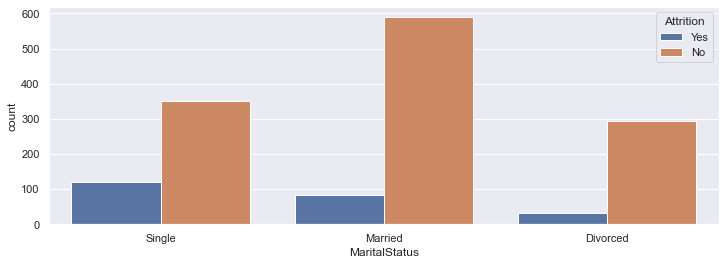

In [300]:
plt.subplots(figsize=(12,4))
sns.countplot(x='MaritalStatus',hue='Attrition',data=IBM_Hr)

<AxesSubplot:xlabel='Gender', ylabel='count'>

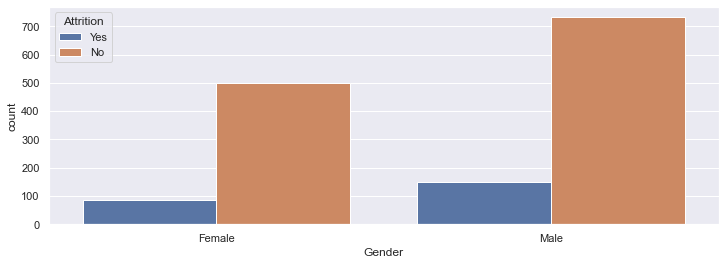

In [301]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Gender',hue='Attrition',data=IBM_Hr)

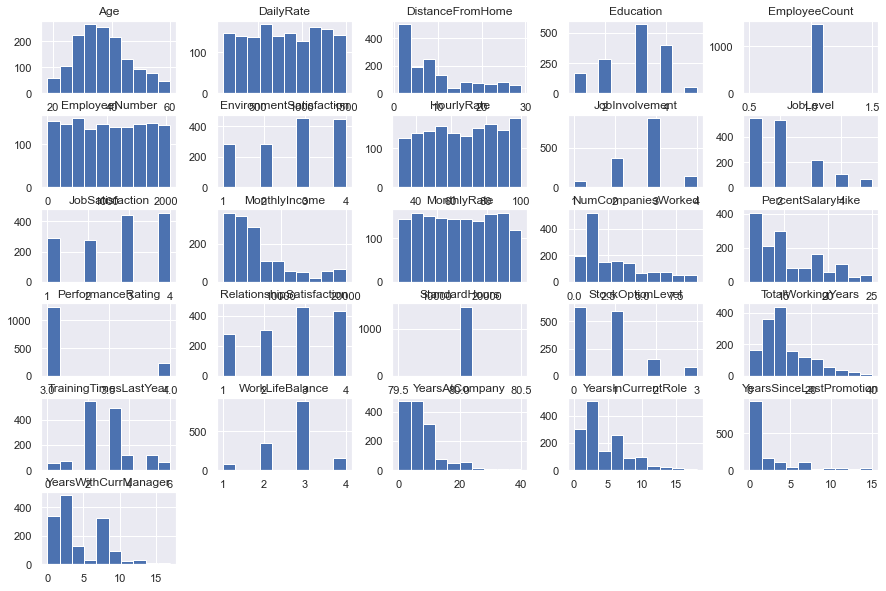

<Figure size 720x288 with 0 Axes>

In [302]:
IBM_Hr.hist(figsize=(15,10),bins=10)
plt.figure(figsize=(10,4))
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Density'>

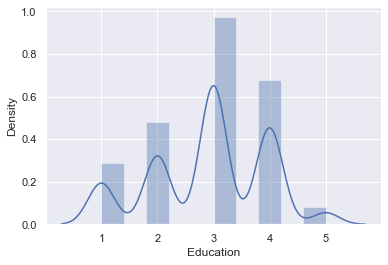

In [303]:
sns.distplot(IBM_Hr['Education'],bins=10)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

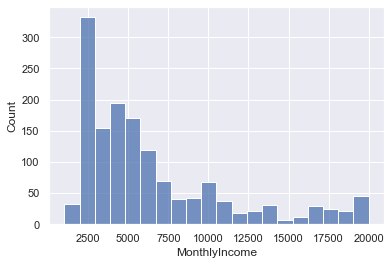

In [304]:
sns.histplot(IBM_Hr['MonthlyIncome'])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

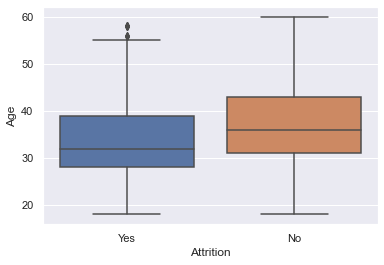

In [305]:
sns.boxplot(x='Attrition',y='Age',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

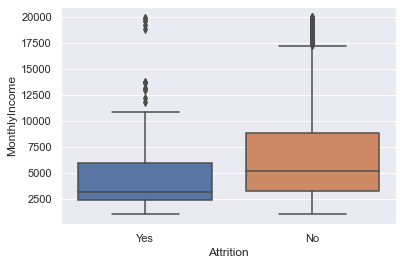

In [306]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

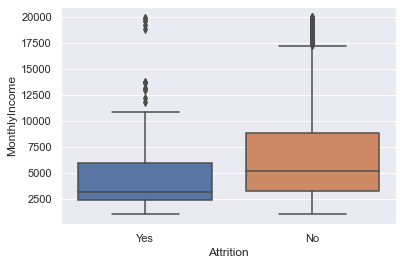

In [307]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=IBM_Hr)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

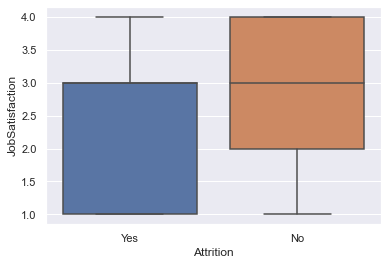

In [308]:
sns.boxplot(x='Attrition',y='JobSatisfaction',data=IBM_Hr)

In [309]:
IBM_Hr.drop('EmployeeCount',axis=1,inplace=True)
IBM_Hr.drop('StandardHours',axis=1,inplace=True)
IBM_Hr.drop('EmployeeNumber',axis=1,inplace=True)
IBM_Hr.drop('Over18',axis=1,inplace=True)
print(IBM_Hr.shape)

(1470, 32)


<AxesSubplot:>

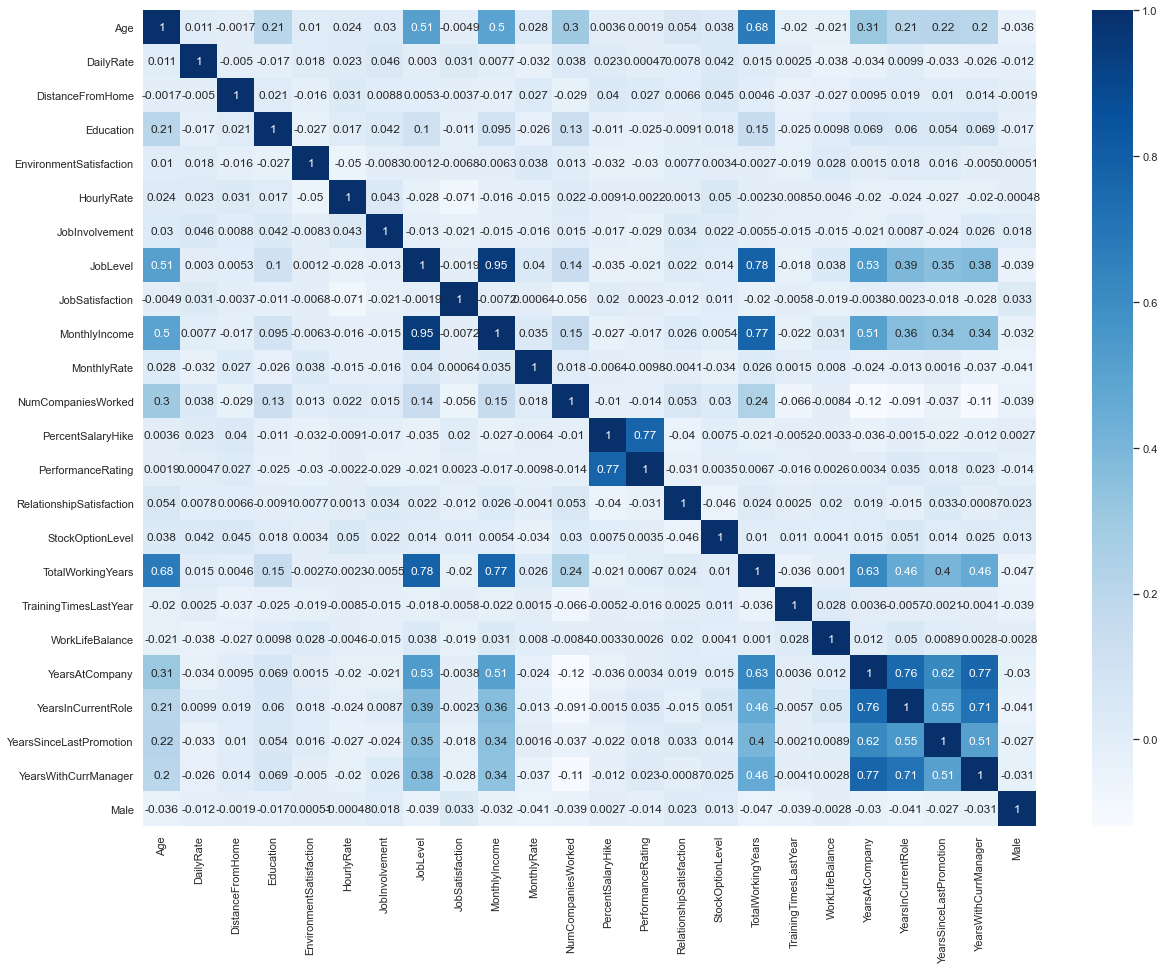

In [310]:
plt.figure(figsize=(20,15))
sns.heatmap(IBM_Hr.corr(),cmap='Blues',annot=True)

droped (Over18,EmployeeCount,StandardHours,EmployeeNumber)

In [311]:
IBM_Hr.shape

(1470, 32)

In [312]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [313]:
#splitting data into result and predictor variables
x=df.iloc[:,1:df.shape[1]].values
y=df.iloc[:,0].values

In [314]:
#train test splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [315]:
#model making
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [316]:
#calculating accuracy on train data 
forest.score(x_train,y_train)

0.9827586206896551

In [317]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8179347826086957
[[298  12]
 [ 55   3]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       310
           1       0.20      0.05      0.08        58

    accuracy                           0.82       368
   macro avg       0.52      0.51      0.49       368
weighted avg       0.74      0.82      0.77       368



In [318]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7934782608695652
[[273  37]
 [ 39  19]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       310
           1       0.34      0.33      0.33        58

    accuracy                           0.79       368
   macro avg       0.61      0.60      0.61       368
weighted avg       0.79      0.79      0.79       368



In [319]:
from sklearn.svm import SVC
svc=SVC()                             
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.842391304347826
[[310   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368

